In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [6]:
df = pd.read_csv('ratings.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
df.drop(df[df['movieId'] != 1].index, inplace=True)
del df['timestamp.1']
df.dtypes

userId                int64
movieId               int64
rating              float64
timestamp    datetime64[ns]
dtype: object

In [7]:
df = df.sort_values(by=['timestamp'])

In [8]:
df["mth_day"] = df['timestamp'].map(lambda x: x.strftime("%m-%d"))
df = df.sort_values(by=['mth_day'])

In [9]:
date = pd.date_range(start='2016-01-01',end='2016-12-31')

In [10]:
df2 = pd.DataFrame({'dates':date})

In [11]:
df2["mth_day1"] = df2['dates'].map(lambda x: x.strftime("%m-%d"))

In [12]:
df2['no_ratings']=0
del df2['dates']
df2.head()

,mth_day1,no_ratings
0,01-01,0
1,01-02,0
2,01-03,0
3,01-04,0
4,01-05,0


In [13]:
i = 0
count = 0
for t in df2.mth_day1:
    count = 0
    #print(t)
    for s in df.mth_day:
        if t == s:
            count +=1
    df2.loc[i] = [t,count]
    i+=1
            
    

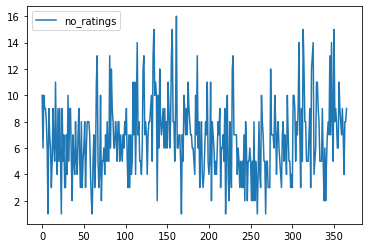

In [14]:
df2.plot()